题目：

用莺尾花数据进行EM算法的GMM模型分类

## 导入数据

1.导入库

In [55]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import datasets

2.导入数据

In [68]:
# 导入数据
iris = datasets.load_iris()     # 花的数据，sklearn中的数据库（就是上面的花）
X = iris.data                  # X表示：花的属性
y = iris.target                # y表示：花的分类

## 2.拟合模型并预测分类

In [57]:
gmm = GaussianMixture(n_components = 3,covariance_type='full',random_state=0)  # 选定GMM模型
gmm.fit(X)                                                                     #  将数据喂给模型
print('预测均值 = \n',gmm.means_)
print('预测方差 = \n',gmm.covariances_)

预测均值 = 
 [[5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]
 [6.54639415 2.94946365 5.48364578 1.98726565]]
预测方差 = 
 [[[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]

 [[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]]


In [58]:
y_hat = gmm.predict(X)     # 给出预测值
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [59]:
# 用之前存在的真实值y 和预测值对比，算出得分
acc = 100 * np.mean(y_hat == y)
acc

96.66666666666667

## 3.绘图

原始数据

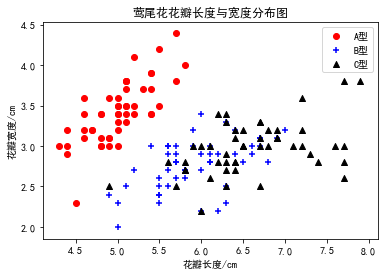

In [61]:
plt.scatter(X[y==0,0],X[y==0,1],color='r',label='A型')
plt.scatter(X[y==1,0],X[y==1,1],color='b',marker='+',label='B型')
plt.scatter(X[y==2,0],X[y==2,1],color='k',marker='^',label='C型')

plt.legend()

plt.xlabel('花瓣长度/cm')
plt.ylabel('花瓣宽度/cm')

plt.title('莺尾花花瓣长度与宽度分布图')

plt.show()